# Time Series Analysis

Time series analysis is a way to get the cycle and trend of the time series data to improve the prediction accuracy.

Data source: https://www.kaggle.com/datasets/shenba/time-series-datasets

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl         
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
mpl.rcParams['figure.figsize'] = (10, 7)               #自訂圖片大小
mpl.rcParams.update({'font.size': 13}) 

In [2]:
data = pd.read_csv('./Electric_Production.csv')

data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


Change the date format

In [3]:
data.columns = ['YM', 'amount']
data['YM'] = data['YM'].apply(lambda x: x.split('/')[2] + x.split('/')[0].zfill(2))

data

,YM,amount
0,198501,72.5052
1,198502,70.6720
2,198503,62.4502
3,198504,57.4714
4,198505,55.3151
...,...,...
392,201709,98.6154
393,201710,93.6137
394,201711,97.3359
395,201712,114.7212


### Data Transformation

Here are four common practices of time series data transformation.
1. Raw data
2. Log
3. Diff
4. Log and Diff

Text(0.5, 1.0, 'Log Diff')

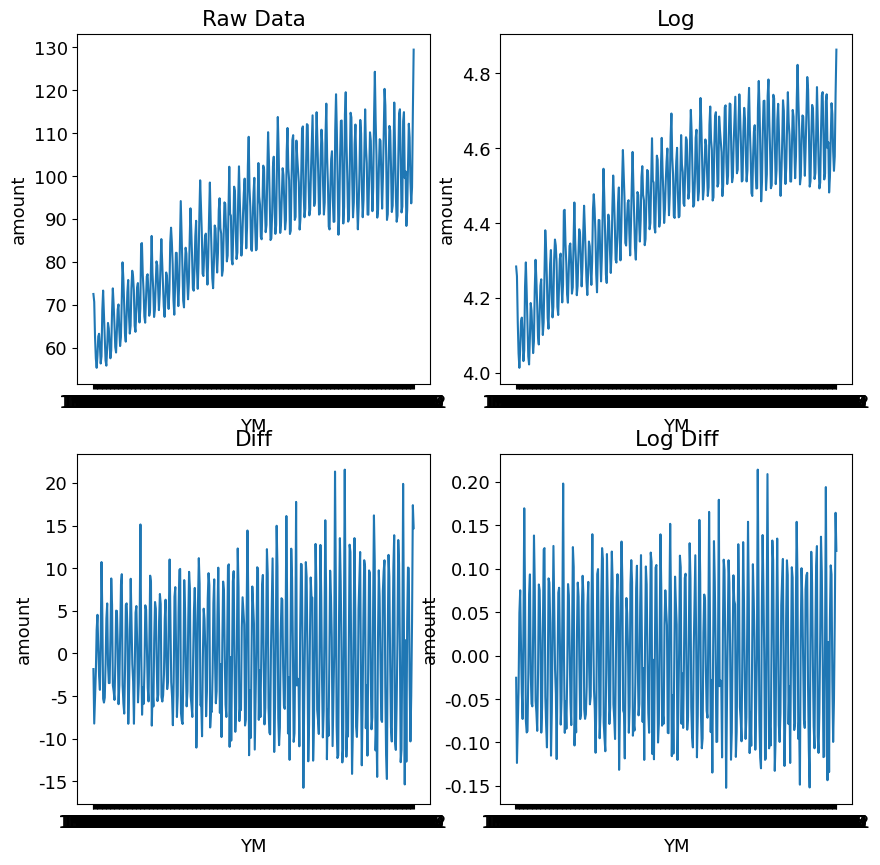

In [4]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
sns.lineplot(x=data['YM'], y=data['amount'], ax=axes[0][0]).set_title('Raw Data')
sns.lineplot(x=data['YM'], y=np.log(data['amount']), ax=axes[0][1]).set_title('Log')
sns.lineplot(x=data['YM'], y=data['amount'].diff(), ax=axes[1][0]).set_title('Diff')
sns.lineplot(x=data['YM'], y=np.log(data['amount']).diff(), ax=axes[1][1]).set_title('Log Diff')

### Data Transform Back

This function can help you transform back the data.

In [5]:
def diff_transform(data, original_column, diff_column):
    return (data[original_column].dropna().values[0] + data[diff_column].cumsum()).combine_first(data[original_column])

In [6]:
data2 = data.copy()
data2['diff1'] = data['amount'].diff()

data2.head(10)

,YM,amount,diff1
0,198501,72.5052,NaN
1,198502,70.6720,-1.8332
2,198503,62.4502,-8.2218
3,198504,57.4714,-4.9788
4,198505,55.3151,-2.1563
5,198506,58.0904,2.7753
6,198507,62.6202,4.5298
7,198508,63.2485,0.6283
8,198509,60.5846,-2.6639
9,198510,56.3154,-4.2692


In [7]:
data2['diff2'] = data2['diff1'].diff() 

data2.head(10)

,YM,amount,diff1,diff2
0,198501,72.5052,NaN,NaN
1,198502,70.6720,-1.8332,NaN
2,198503,62.4502,-8.2218,-6.3886
3,198504,57.4714,-4.9788,3.2430
4,198505,55.3151,-2.1563,2.8225
5,198506,58.0904,2.7753,4.9316
6,198507,62.6202,4.5298,1.7545
7,198508,63.2485,0.6283,-3.9015
8,198509,60.5846,-2.6639,-3.2922
9,198510,56.3154,-4.2692,-1.6053


In [8]:
diff_transform(data2, 'diff1', 'diff2').head(10)

0       NaN
1   -1.8332
2   -8.2218
3   -4.9788
4   -2.1563
5    2.7753
6    4.5298
7    0.6283
8   -2.6639
9   -4.2692
Name: diff2, dtype: float64

In [9]:
diff_transform(data2, 'amount', 'diff1').head(10)

0    72.5052
1    70.6720
2    62.4502
3    57.4714
4    55.3151
5    58.0904
6    62.6202
7    63.2485
8    60.5846
9    56.3154
Name: diff1, dtype: float64

### Data Stability

Most of the time, we will feed stable data to time series model.

In [10]:
from statsmodels.tsa.api import acf, adfuller, kpss

import warnings
warnings.filterwarnings('ignore')

#### ADF Test

The second output is P-value, if it >= 0.05, the data is unstable.

In [11]:
adfuller(data['amount'])

(-2.256990350047253,
 0.18621469116586498,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

#### KPSS Test

The second output is P-value, if it < 0.05, the data is unstable.

In [12]:
kpss(data['amount'])

(3.5315970094994853,
 0.01,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Check out the diff of the data.  
The results show the diff of the data is stable.

In [13]:
print(f"ADF: {adfuller(data['amount'].diff().dropna())[1]}")

print(f"KPSS: {kpss(data['amount'].diff().dropna())[1]}")

ADF: 4.077786565539053e-10
KPSS: 0.1


**The raw data is unstable, but the diff of the data is stable.**

### Autocorrelation Test

A higher or lower point means a high correlation.

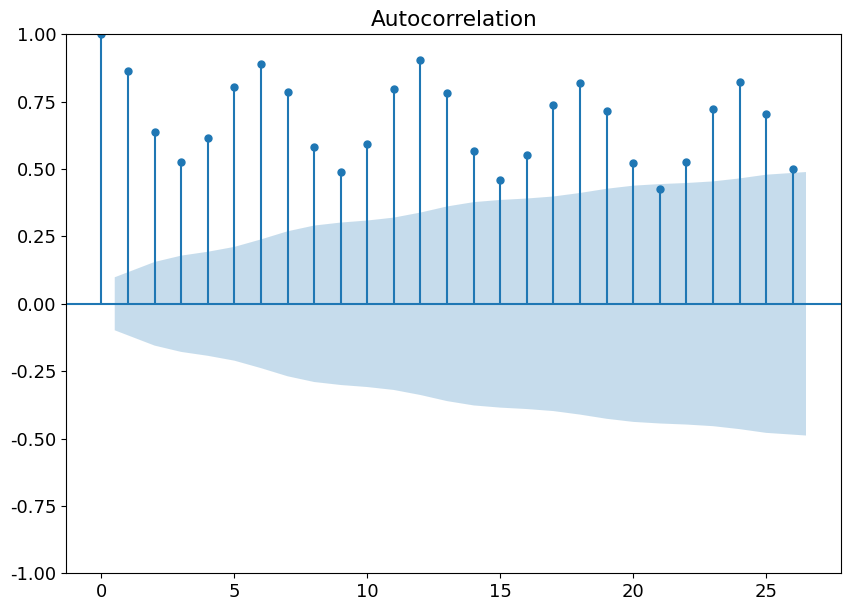

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['amount']).show()

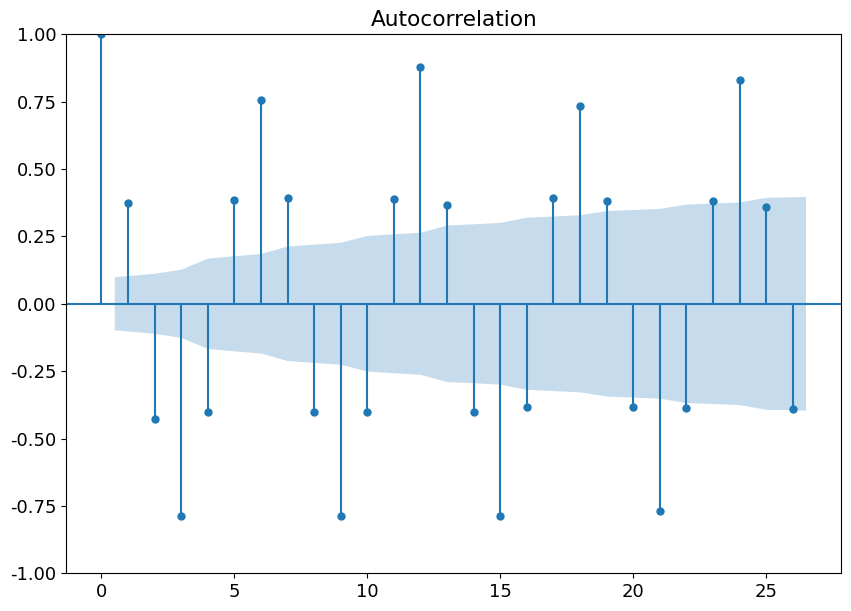

In [15]:
plot_acf(data['amount'].diff().dropna()).show()

### Seasonal Decompose

Check the seasonity of the data. 

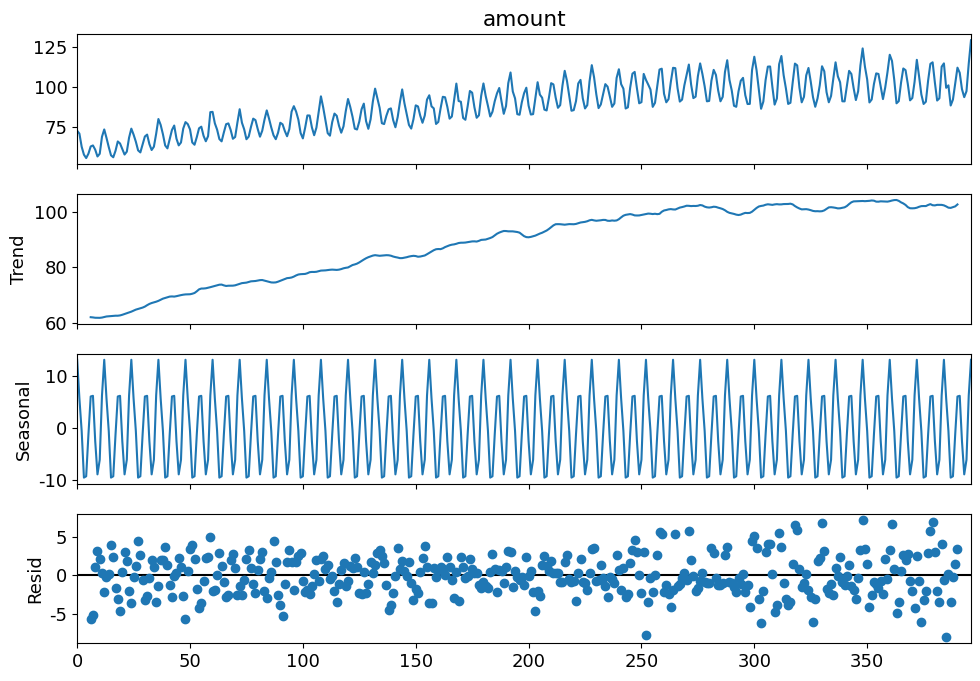

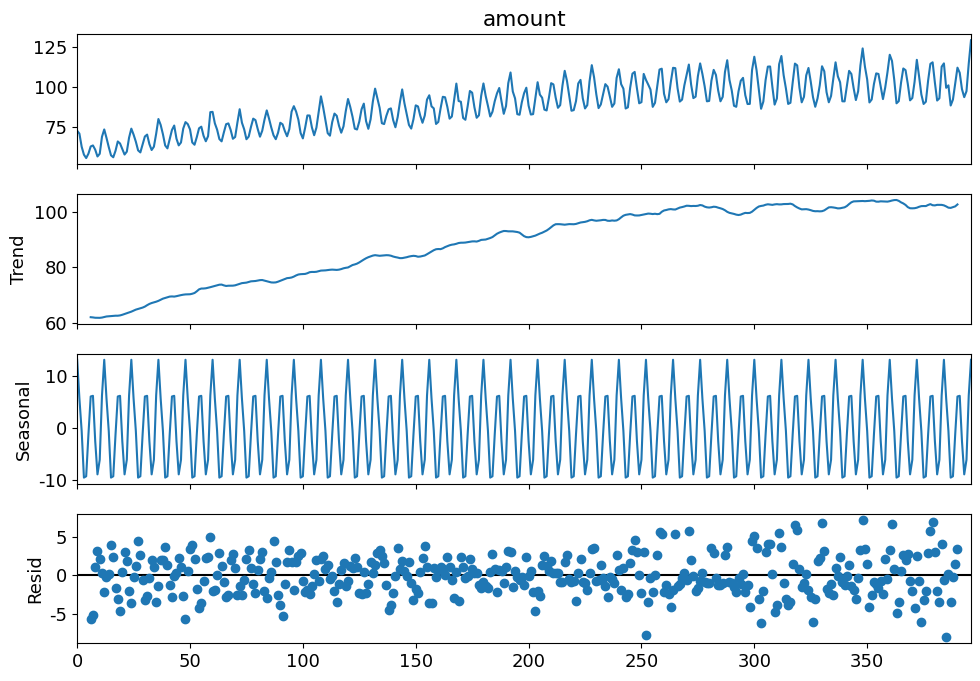

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

r = seasonal_decompose(data['amount'], model='additive', period=12)
r.plot()

## Model

From now on, we will start to try different kinds of models. Every model has its pros and cons. If you don't know which one is better fitting, give it a try. 
We will implement the following models:
1. AutoRegression
2. Moving Average
3. Seasonal Autoregressive Integrated Moving-Average
4. Vector Autoregression
5. VARMA
6. Holt Winter's Exponential Smoothing (HWES)

The models would be trained with 200 raw data samples, the remaining would be the test data.

### AutoRegression

In [17]:
from statsmodels.tools.eval_measures import aic, bic
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg

In [18]:
def autoregression(data, training_sample):
    model_dict = dict()
    legend_name = {
    'n':'no trend',
    'c':'constant',
    't':'time trend only',
    'ct':'constant & time trend',
    }
    for i in ['n', 'c', 't', 'ct']:
        x = data['amount'][:training_sample]
        model_dict[i] = AutoReg(x, lags=1, seasonal=True, period=12, trend=i)
        model_dict[i] = model_dict[i].fit()
        print(f'AIC of {legend_name[i]} is {model_dict[i].aic}')
        print(f'BIC of {legend_name[i]} is {model_dict[i].bic}')
        model_dict[i] = model_dict[i].predict(0, len(data) - 1)
        mae = mean_absolute_error(data['amount'][training_sample:], 
            model_dict[i][training_sample:])
        print(f'MAE of {legend_name[i]} is {mae}')
    thick_size = 5
    for i in ['raw_data', 'n', 'c', 't', 'ct']:
        if i == 'raw_data':
            sns.lineplot(x=range(0, len(data)), y=data['amount'], label=i, linewidth=thick_size)
        else:
            sns.lineplot(x=range(0, len(data)), y=model_dict[i], label=legend_name[i], linewidth=thick_size)
        thick_size -= 1
    plt.vlines(x=training_sample, ymin=0, ymax=data['amount'].max(), color='red')

AIC of no trend is 859.5928213513573
BIC of no trend is 905.6990888975002
MAE of no trend is 12.677233678930866
AIC of constant is 859.5928213513574
BIC of constant is 905.6990888975004
MAE of constant is 12.677233679338347
AIC of time trend only is 810.9429999788103
BIC of time trend only is 860.3425723496778
MAE of time trend only is 9.337369611362579
AIC of constant & time trend is 810.9429999788103
BIC of constant & time trend is 860.3425723496778
MAE of constant & time trend is 9.337369611366176


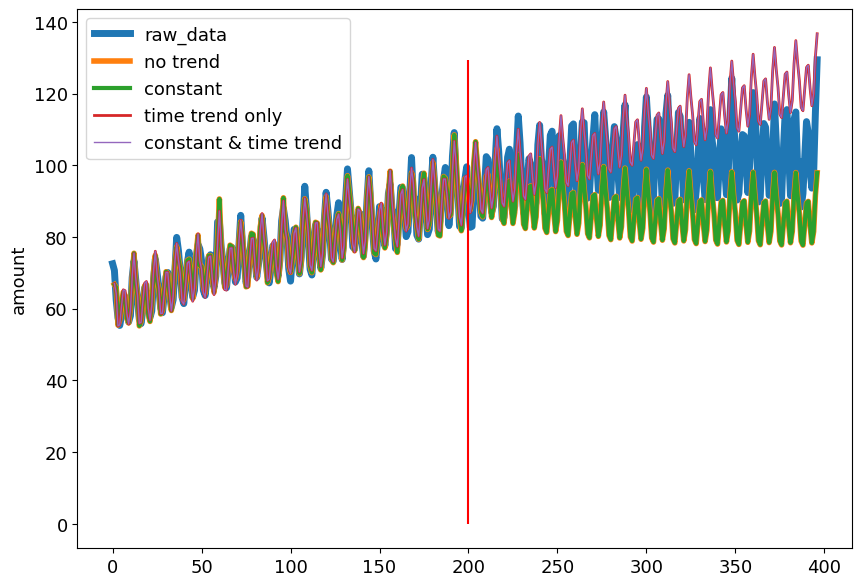

In [19]:
autoregression(data, 200)

**The settings with time trend have a better fitting.**

### Moving Average

In [20]:
from statsmodels.tsa.arima.model import ARIMA

def moving_average(data, training_sample, model_type):
    # p(AR), d(difference), q(MA), s(seasonal)
    order_type = {
        'MA':{
            'seasonal_order':(0, 0, 1, 12)},
        'ARMA':{
            'seasonal_order':(1, 0, 1, 12)},
        'ARIMA':{
            'seasonal_order':(1, 1, 1, 12)}
    }
    x = data['amount'][:training_sample]
    model = ARIMA(x, **order_type[model_type])
    model_fit = model.fit()
    y = model_fit.predict(12, len(data) + 11)
    mae = mean_absolute_error(data['amount'][training_sample:], 
            y[training_sample:])
    print(f'AIC of {model_type} is {model_fit.aic}')
    print(f'BIC of {model_type} is {model_fit.bic}')
    print(f'MAE of {model_type} is {mae}')

    sns.lineplot(x=range(0, len(data)), y=data['amount'], label='real sales')
    sns.lineplot(x=range(0, len(data)), y=y, label='predicted results')
    plt.vlines(x=training_sample, ymin=0, ymax=data['amount'].max() ,color='red')

AIC of MA is 1353.852825614426
BIC of MA is 1363.74777771407
MAE of MA is 22.606034733568574


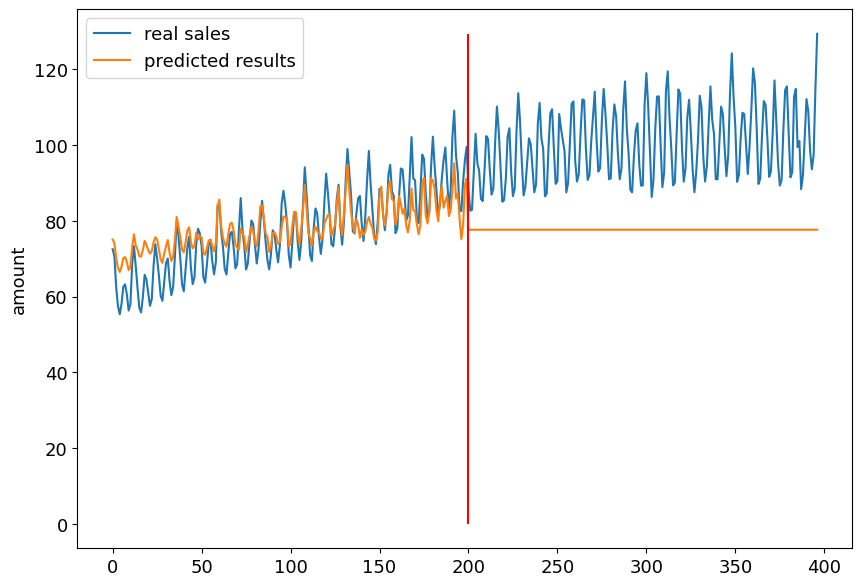

In [21]:
moving_average(data, 200, 'MA')

AIC of ARMA is 1077.0368104096779
BIC of ARMA is 1090.23007987587
MAE of ARMA is 10.689030965023642


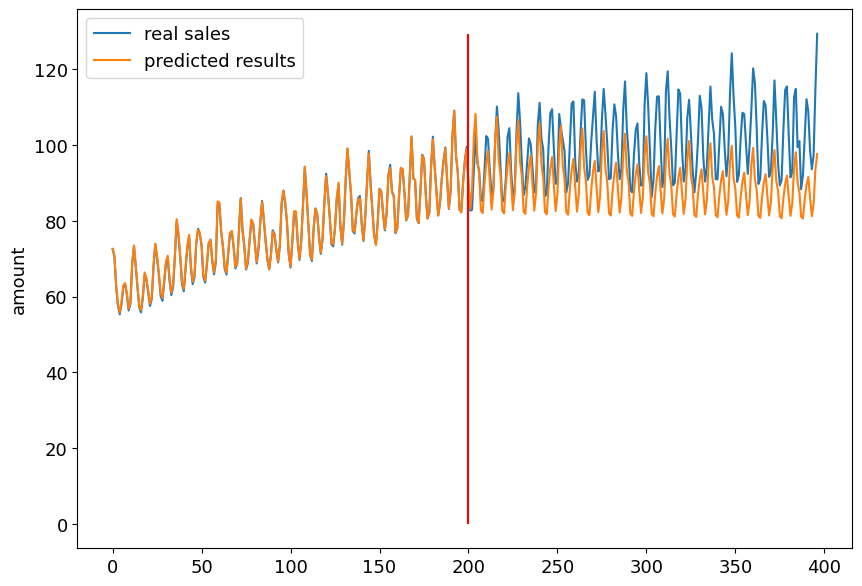

In [22]:
moving_average(data, 200, 'ARMA')

AIC of ARIMA is 928.5068833687911
BIC of ARIMA is 938.216209257281
MAE of ARIMA is 9.848408043725147


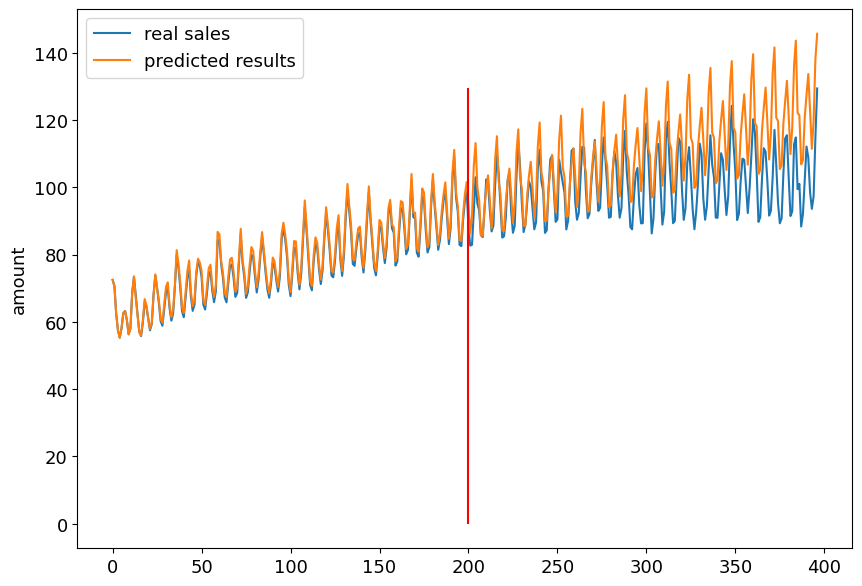

In [23]:
moving_average(data, 200, 'ARIMA')

**The ARIMA model has a better fitting.**

### Seasonal Autoregressive Integrated Moving-Average

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def SAIMA(data, training_sample):
    x = data['amount'][:training_sample]
    model = SARIMAX(x, seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    y = model_fit.predict(12, len(data) + 11)
    mae = mean_absolute_error(data['amount'][training_sample:], 
            y[training_sample:])
    print(f'AIC of SARIMA is {model_fit.aic}')
    print(f'BIC of SARIMA is {model_fit.bic}')
    print(f'MAE of SARIMA is {mae}')
    sns.lineplot(x=range(0, len(data)), y=data['amount'], label='real sales')
    sns.lineplot(x=range(0, len(y)), y=y, label='predicted results')
    plt.vlines(x=training_sample, ymin=0, ymax=data['amount'].max(), color='red')

AIC of SARIMA is 811.4973591888466
BIC of SARIMA is 824.4431270401665
MAE of SARIMA is 9.29863530476128


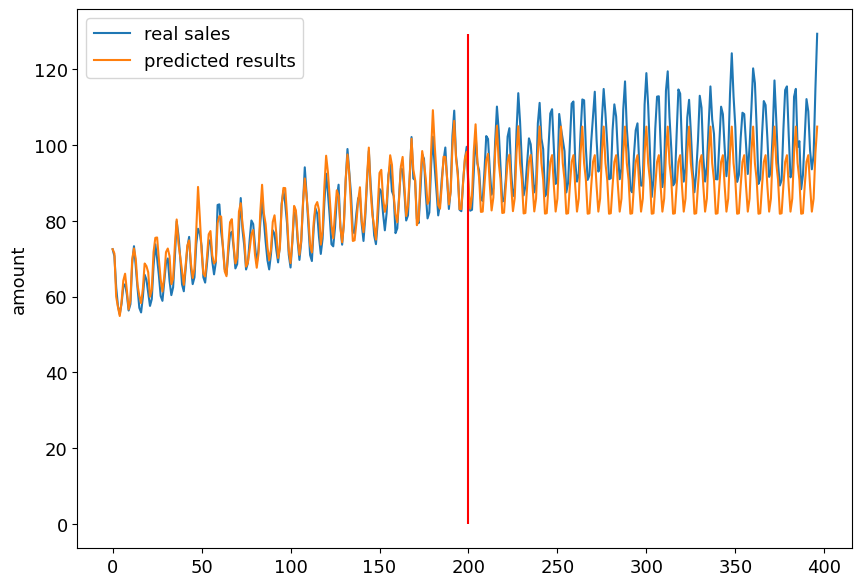

In [25]:
SAIMA(data, 200)

**SARIMA is better than befores.**

### Vector Autoregression

The difference between VA and AR is that VA is multivariate and AR is univariate.

We don't have the second variable in this dataset, so I use the lag data to replace it.

#### Different Lags

In [26]:
from statsmodels.tsa.vector_ar.var_model import VAR

def VA(data, training_sample):
    varify_table = pd.DataFrame()
    data['amount_2'] = data['amount'].shift(1)
    data['amount_3'] = data['amount'].shift(2)
    data = data.fillna(0)
    x = data.loc[:training_sample, ['amount', 'amount_2', 'amount_3']]
    sns.lineplot(x=range(0, len(data) - len(x) + 1), y=data['amount'][training_sample:], label='raw data', linewidth=2)
    for lags in [1, 6, 12, 18, 24, 30, 36]:
        model = VAR(x)
        model_fit = model.fit(maxlags=lags)
        y = model_fit.forecast(np.array(x), steps=len(data) - len(x) + 1)
        mae = mean_absolute_error(data['amount'][training_sample:], y[:, 1])
        varify_table = pd.concat([varify_table, pd.DataFrame([[lags, model_fit.aic, model_fit.bic, mae]])])
        sns.lineplot(x=range(0, len(y)), y=y[:, 1], label=f'lags {lags}')
    varify_table.columns = ['Lags', 'AIC', 'BIC', 'MAE']
    print(varify_table)

   Lags         AIC         BIC        MAE
0     1 -121.938865 -121.740966  21.741739
0     6 -121.059454 -120.102731  14.574319
0    12 -115.257166 -113.353283   7.039095
0    18 -115.229967 -112.336168   3.416315
0    24 -114.799731 -110.869919   3.397016
0    30 -113.384963 -108.369324   3.509648
0    36 -116.353150 -110.197731   4.496882


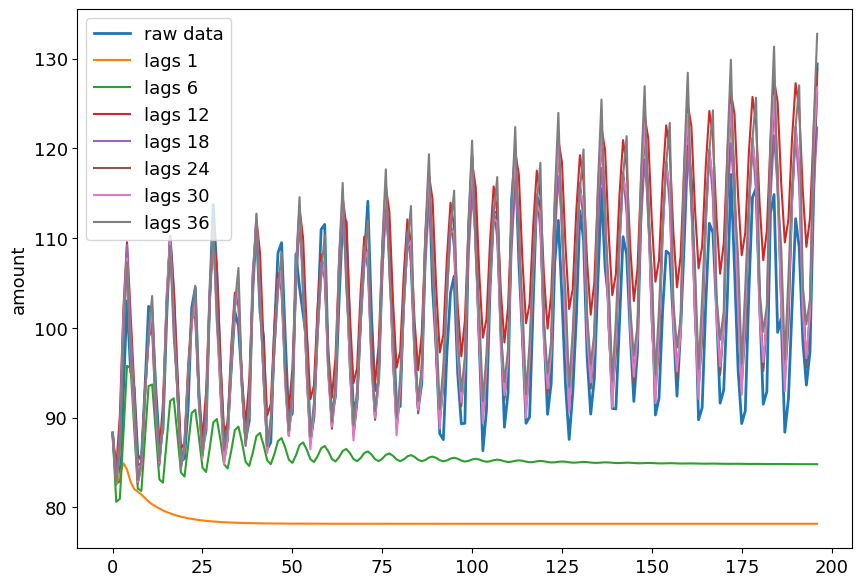

In [27]:
VA(data, 200)

**I will use `Lags=24` to choose the best trend type.**

#### Different Trends

In [28]:
def VA(data, training_sample):
    varify_table = pd.DataFrame()
    data['amount_2'] = data['amount'].shift(1)
    data['amount_3'] = data['amount'].shift(2)
    data = data.fillna(0)
    x = data.loc[:training_sample, ['amount', 'amount_2', 'amount_3']]
    sns.lineplot(x=range(0, len(data) - len(x) + 1), y=data['amount'][training_sample:], label='raw data', linewidth=2)
    for trend in ['c', 'ct', 'ctt', 'n']:
        model = VAR(x)
        model_fit = model.fit(maxlags=24, trend=trend)
        y = model_fit.forecast(np.array(x), steps=len(data) - len(x) + 1)
        mae = mean_absolute_error(data['amount'][training_sample:], y[:, 1])
        varify_table = pd.concat([varify_table, pd.DataFrame([[trend, model_fit.aic, model_fit.bic, mae]])])
        sns.lineplot(x=range(0, len(y)), y=y[:, 1], label=f'trend {trend}')
    varify_table.columns = ['Lags', 'AIC', 'BIC', 'MAE']
    print(varify_table)

  Lags         AIC         BIC        MAE
0    c -114.799731 -110.869919   3.397016
0   ct -115.160247 -111.176601   7.648831
0  ctt -106.660389 -102.622911  10.484977
0    n -116.101488 -112.225508  14.683462


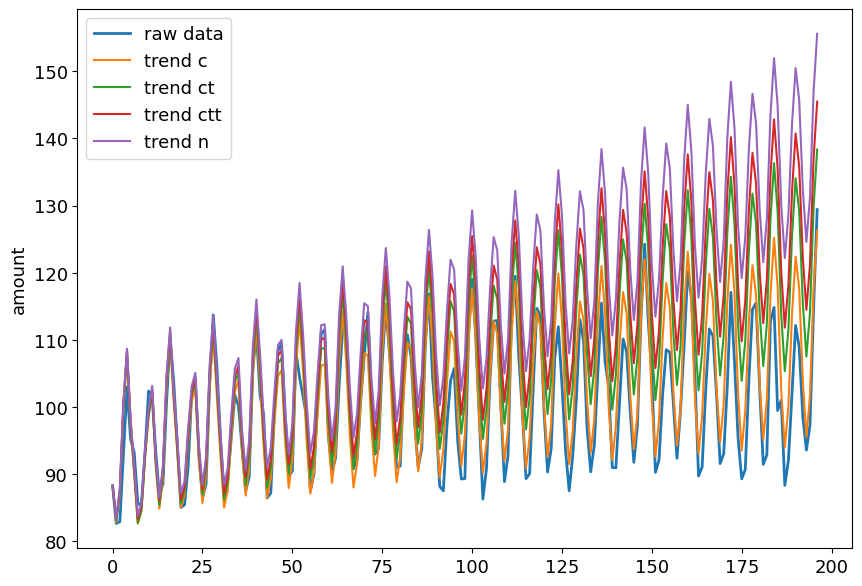

In [29]:
VA(data, 200)

**For VA, `lags=24` and `trend='c'` has a better fitting.**

### VARMA

VARMA vs ARMA, VARMA is multivariate and ARMA is univariate

In [30]:
from statsmodels.tsa.statespace.varmax import VARMAX

def VARMA(data, training_sample):
    data['amount_2'] = data['amount'].shift(1)
    data['amount_3'] = data['amount'].shift(2)
    data = data.fillna(0)
    x = data.loc[2:training_sample, ['amount', 'amount_2', 'amount_3']]
    # model = VARMAX(x, order=(1, 1), trend='ct')
    model = VARMAX(x[['amount', 'amount_2', 'amount_3']], trend='ctt')
    model_fit = model.fit(disp=False)
    y = model_fit.predict(0, len(data) - 1)
    # y = model_fit.get_prediction(0, len(data) -1)
    # y = model_fit.forecast(np.array(x))
    sns.lineplot(x=range(0, len(data)), y=data['amount'], label='real sales')
    sns.lineplot(x=range(0, len(data)), y=y.iloc[:, 2], label='predicted results')
    plt.vlines(x=training_sample, ymin=0, ymax=data['amount'].max(), color='red')
    return model_fit

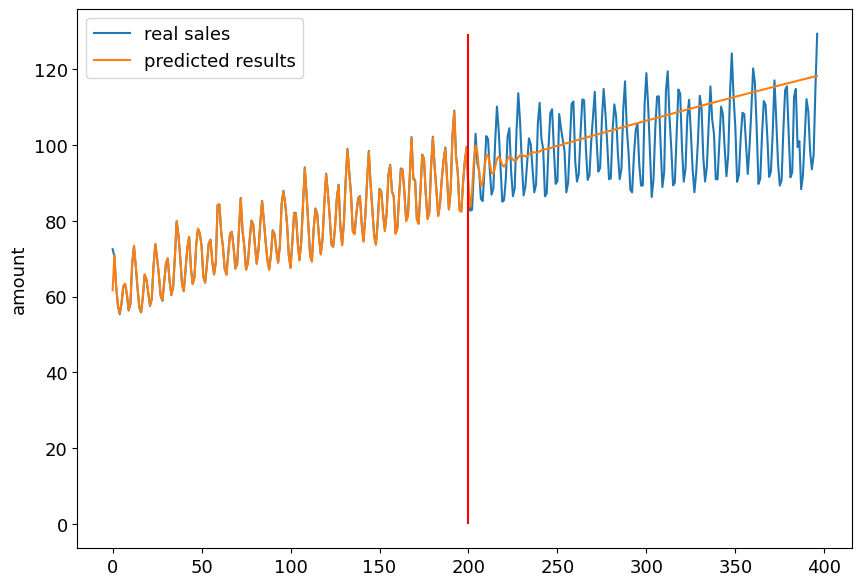

In [31]:
VARMA(data, 200)

### Holt Winter’s Exponential Smoothing (HWES)

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def HWES(data, training_sample, predicted_sample):
    varify_table = pd.DataFrame()
    sns.lineplot(x=range(0, len(data)), y=data['amount'], label='raw data', linewidth=2)
    plt.vlines(x=training_sample, ymin=0, ymax=data['amount'].max() ,color='red')
    for seasonal_type in ['mul', 'add', 'additive', 'multiplicative']:
        x = data['amount'][:training_sample]
        model = ExponentialSmoothing(np.array(x), trend=seasonal_type, seasonal_periods=12, seasonal=seasonal_type)
        model_fit = model.fit()
        y = model_fit.predict(0, len(data) - 1)
        mae = mean_absolute_error(data['amount'][training_sample:], y[training_sample:])
        sns.lineplot(x=range(0, len(y)), y=y, label=f'{seasonal_type}')
        varify_table = pd.concat([varify_table, pd.DataFrame([[seasonal_type, model_fit.aic, model_fit.bic, mae]])])
    varify_table.columns = ['Seasonal Type', 'AIC', 'BIC', 'MAE']
    print(varify_table)

    Seasonal Type         AIC         BIC        MAE
0             mul  239.733357  292.506435  13.228552
0             add  288.425366  341.198444   8.369271
0        additive  288.425366  341.198444   8.369271
0  multiplicative  239.733357  292.506435  13.228552


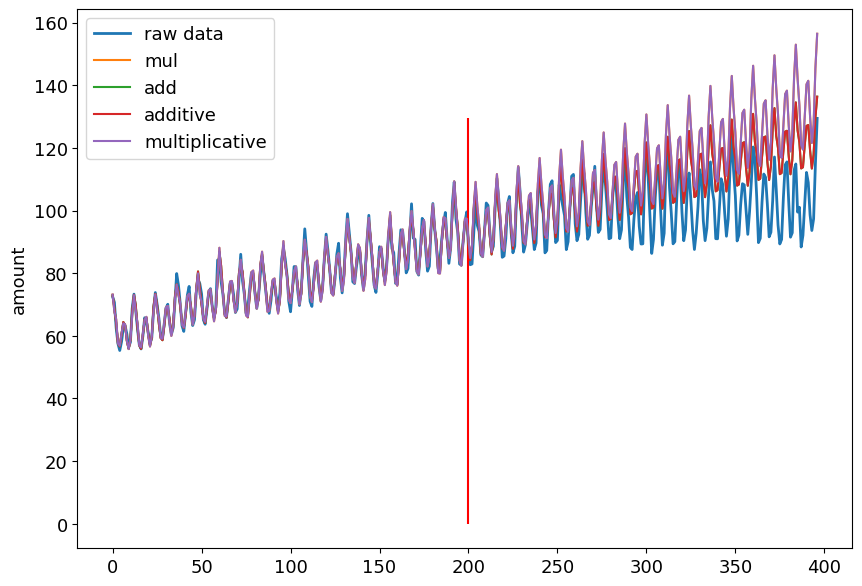

In [33]:
HWES(data, 200, 100)

**Additive and add seasonal type have the same and better fitting.**